# <center> 4- Exploration des données </center>

**Source :** HARRISON Matt, Machine learning, les fondamentaux : exploiter des données structurées en Python, First, Paris, 2020, p.43-59.
        
### Objectif :
Réaliser une analyse exloratoire des données. 

--- 

## Importations

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import jointplot
from seaborn import pairplot
from seaborn import boxplot
from seaborn import violinplot
from sklearn import model_selection
from yellowbrick.features import JointPlotVisualizer

## Chargement du dataset

In [126]:
df = pd.read_excel("titanic3.xls")

In [127]:
df = df.drop(columns=["name", "ticket", "home.dest", "boat", "body", "cabin"])
df = pd.get_dummies(df, drop_first=True)
df = df.fillna(0)

In [128]:
y = df.survived
X = df.drop(columns="survived")

In [129]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

## Volumétrie des données

In [130]:
# nb de lignes et de colonnes
X.shape

(1309, 8)

## Statistiques globales

In [131]:
# première et dernière colonne
X.describe().iloc[:, [0, -1]]

,pclass,embarked_S
count,1309.000000,1309.000000
mean,2.294882,0.698243
std,0.837836,0.459196
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,1.000000
75%,3.000000,1.000000
max,3.000000,1.000000


## Histogramme

<AxesSubplot:ylabel='Frequency'>

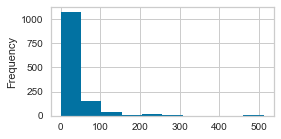

In [132]:
fig, ax = plt.subplots(figsize=(4, 2))
X['fare'].plot(kind="hist", ax=ax)

## Nuage de points

Përmet de voir les relations entre deux colonnes numériques.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='fare'>

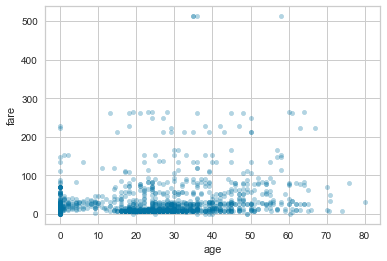

In [133]:
fig, ax = plt.subplots(figsize=(6, 4))
X.plot.scatter(x="age", y="fare", ax=ax, alpha=0.3)

### Quantifier la corrélation entre deux colonnes :

In [134]:
X.age.corr(X.fare)

0.21349650040194806

## *Join plot* (nuage à ligne de régression)

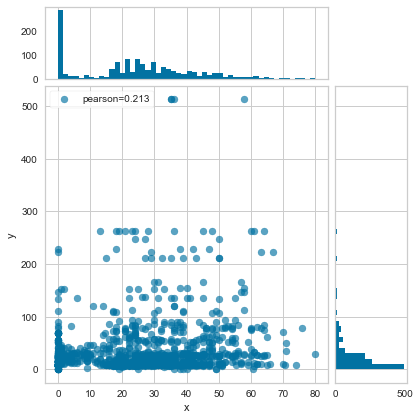

<AxesSubplot:xlabel='x', ylabel='y'>

In [135]:
ig, ax = plt.subplots(figsize=(6, 6))
nuage = JointPlotVisualizer(feature="age", target="fare")
nuage.fit(X["age"], X["fare"])
nuage.poof()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


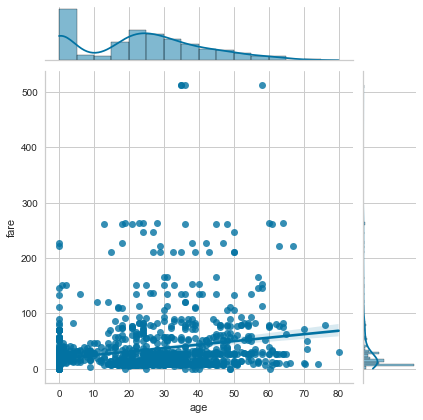

In [136]:
## avec seaborn :
# from seaborn import jointplot
new_df = X.copy()
new_df["target"] = y
p = jointplot("age", "fare", data=new_df, kind="reg")

## Grille de paires (avec **seaborn**)

Matrice de colonnes avec des estimations de densités de noyau.

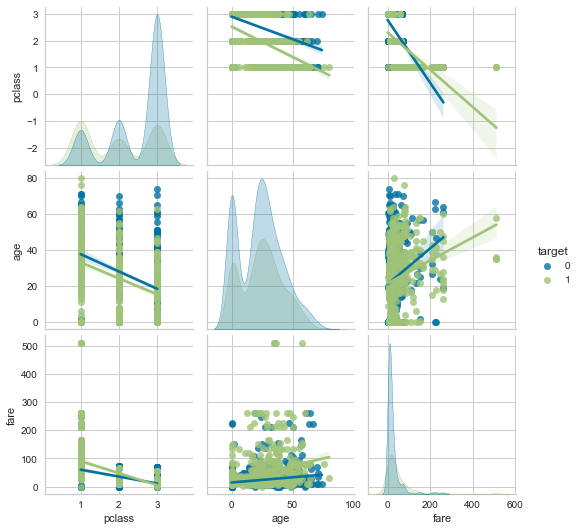

In [137]:
# from seaborn import pairplot
new_df = X.copy()
new_df["target"] = y
vars = ["pclass", "age", "fare"]
p = pairplot(new_df, vars=vars, hue="target", kind="reg")

## Boîtes à moustaches et boîtes violon

Permettent de visualiser une caractéristique par rapport à une cible.

<AxesSubplot:xlabel='target', ylabel='age'>

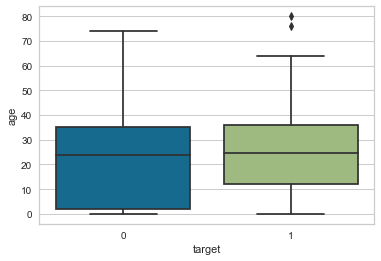

In [138]:
# from seaborn import boxplot
fig, ax = plt.subplots(figsize=(6, 4))
new_df = X.copy()
new_df["target"] = y
boxplot(x="target", y="age", data=new_df)

<AxesSubplot:xlabel='target', ylabel='sex_male'>

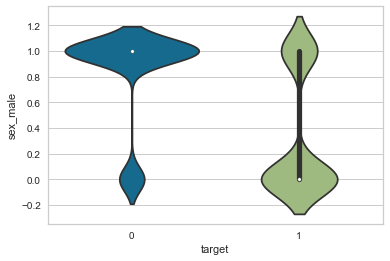

In [139]:
# from seaborn import violinplot
fig, ax = plt.subplots(figsize=(6, 4))
new_df = X.copy()
new_df["target"] = y
violinplot(x="target", y="sex_male", data=new_df)

## Corrélations

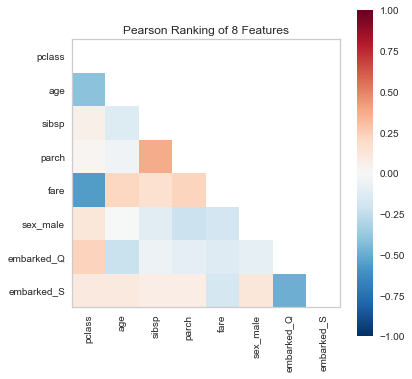

<AxesSubplot:title={'center':'Pearson Ranking of 8 Features'}>

In [140]:
## corrélation de Pearson
from yellowbrick.features import Rank2D
fig, ax = plt.subplots(figsize=(6, 6))
pcv = Rank2D(
    features=X.columns, algorithm="pearson"
)
pcv.fit(X, y)
pcv.transform(X)
pcv.poof()

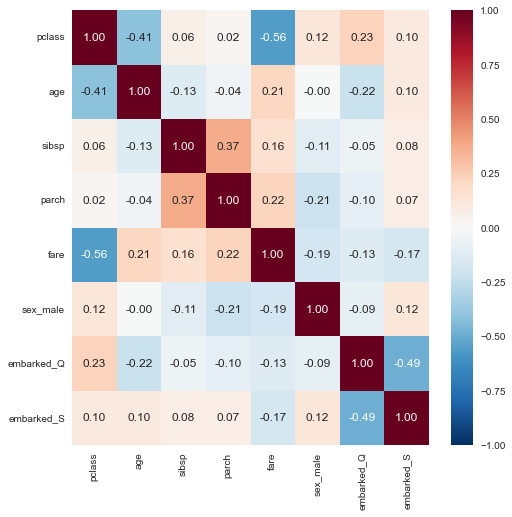

In [141]:
# carte d'intensité heatmap
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(8, 8))
ax = heatmap(
    X.corr(),
    fmt=".2f",
    annot=True,
    ax=ax,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,)

In [142]:
# corrélation sur 2 colonnes avec pandas :
X.corr().iloc[:, :2]

,pclass,age
pclass,1.000000,-0.410068
age,-0.410068,1.000000
sibsp,0.060832,-0.134465
parch,0.018322,-0.039940
fare,-0.558803,0.213497
sex_male,0.124617,-0.000332
embarked_Q,0.230491,-0.224154
embarked_S,0.096335,0.098973


## Radviz

C'est un diagramme de visualisation radiale qui présente les caractéristiques sur la circonférences et les valeurs dans un nuages de point. Les valeurs sont normalisées. Il s'agit d'une technique permettant de voir le degré de séparation entre cibles.

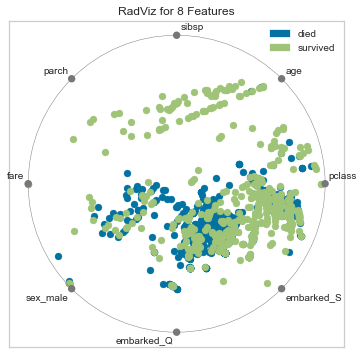

<AxesSubplot:title={'center':'RadViz for 8 Features'}>

In [143]:
from yellowbrick.features import RadViz
fig, ax = plt.subplots(figsize=(6, 6))
rv = RadViz(
    classes=["died", "survived"],
    features=X.columns,)
rv.fit(X, y)
_ = rv.transform(X)
rv.poof()

<AxesSubplot:>

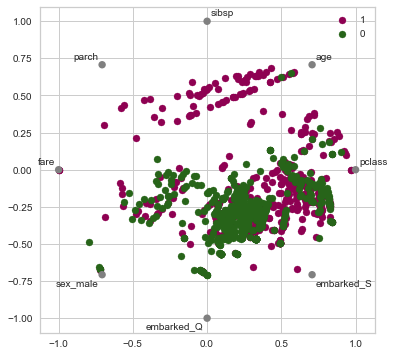

In [144]:
# Avec pandas :
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(6, 6))
new_df = X.copy()
new_df["target"] = y
radviz(new_df, "target", ax=ax, colormap="PiYG")

## Coordonnées parallèles 

Permet de voir les regroupements.

C:\Users\PC\AppData\Local\Temp\ipykernel_64180\2710467197.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


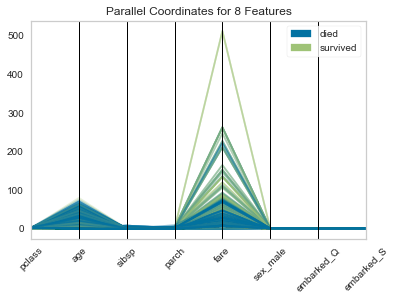

<AxesSubplot:title={'center':'Parallel Coordinates for 8 Features'}>

In [145]:
from yellowbrick.features import ParallelCoordinates
fig, ax = plt.subplots(figsize=(6, 4))
pc = ParallelCoordinates(
    classes=["died", "survived"],
    features=X.columns)
pc.fit(X, y)
pc.transform(X)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45)
pc.poof()

[Text(0, 0, 'pclass'),
 Text(1, 0, 'age'),
 Text(2, 0, 'sibsp'),
 Text(3, 0, 'parch'),
 Text(4, 0, 'fare'),
 Text(5, 0, 'sex_male'),
 Text(6, 0, 'embarked_Q'),
 Text(7, 0, 'embarked_S')]

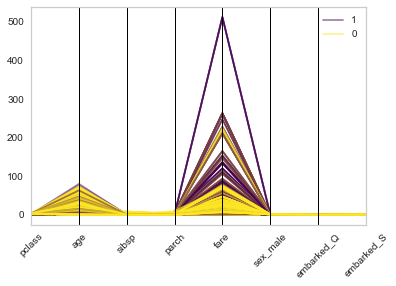

In [146]:
# idem avec pandas :
from pandas.plotting import parallel_coordinates
    
fig, ax = plt.subplots(figsize=(6, 4))
new_df = X.copy()
new_df["target"] = y
parallel_coordinates(
    new_df,
    "target",
    ax=ax,
    colormap="viridis",
    alpha=0.5,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

---